In [1]:
#Import the pandas and praw libraries
import praw 
import pandas as pd
import time

In [2]:
#Create a new praw API instance with your client id, client secret and user agent.
CLIENT_ID = "UlEjBW6poBCniw"
CLIENT_SECRET = "e2D197G9kZJAeAe4kGoSv6h-h_k"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/Veradio)"

In [3]:
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT)

In [4]:
api.read_only

True

In [5]:
#Get the 500 most recent submissions from a subreddit of your choice. 

#Transform the submissions in a new list with a dictionary per submission. 

recent = api.subreddit('cirkeltrek').new(limit = 500)
recent=list(recent)
submissions = []
for submission in recent:
    submissions.append({
        "author" : submission.author,
        "score" : submission.score,
        "comments" :submission.num_comments,
        "title" : submission.title,
        "time" : time.ctime(submission.created_utc)
    })    

In [6]:
#Create a new Pandas dataframe from this list and show the first five items.

df = pd.DataFrame(submissions)
df.head()
print (df.head())

              author  comments  score                      time  \
0          thomar123         0      1  Fri Nov 16 13:20:03 2018   
1          super_pim         1      8  Fri Nov 16 13:14:39 2018   
2       drogehumornl         1      4  Fri Nov 16 13:13:13 2018   
3  knapperigmannetje         0      2  Fri Nov 16 13:08:55 2018   
4           DJathome         2      3  Fri Nov 16 13:05:56 2018   

                                            title  
0  Jongens we hebben een mededeling, stop pesten!  
1                Sinterklaas kan het niet schelen  
2                                             ...  
3                           Word ook postbezorger  
4                 Mooie spelling van de sint zelf  


In [7]:
#Show the names of the 10 authors in the dataframe that made the most submissions, 
#and how many submissions they made.
df["author"].value_counts().head(10)

HendrikDoeff       11
Tindall42           9
minkelmaat202       8
xXMattie            7
pip_pip_pippin      7
thomar123           6
bigboiwillem        5
epicblackiechan     5
kabelverhuur        5
Jan_Aars            5
Name: author, dtype: int64

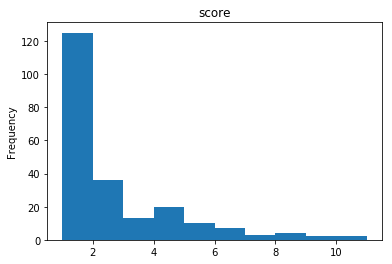

In [9]:
#Plot two histograms with ten bins (1/2): 
#one for the comment counts and  one for the scores of all submissions. 
#Both plots should have a title indicating their contents

df["score"].value_counts().plot(kind = 'hist', bins = 10, title = 'score')

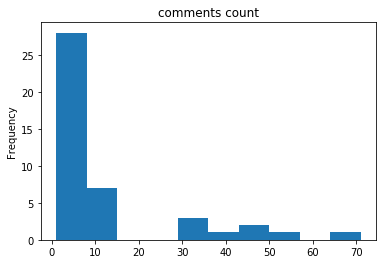

In [14]:
#Plot two histograms with ten bins (2/2): 
#one for the comment counts and  one for the scores of all submissions. 
#Both plots should have a title indicating their contents

df["comments"].value_counts().plot(kind = 'hist', bins = 10, title = 'comments count')

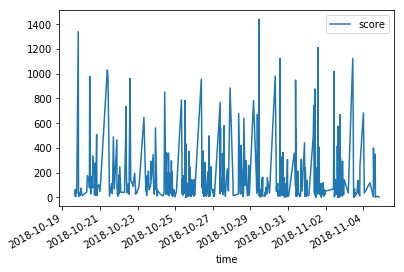

In [15]:
#Make a line plot showing the number of posts per hour/day/month, 
#depending on the frequency of posting in your chosen subreddit. 
#You'll need to convert the time of creation to a new Pandas series and resample that to hour/day/month.


df.time = pd.to_datetime(df.time.astype(str))
df.plot(x="time", y="score")

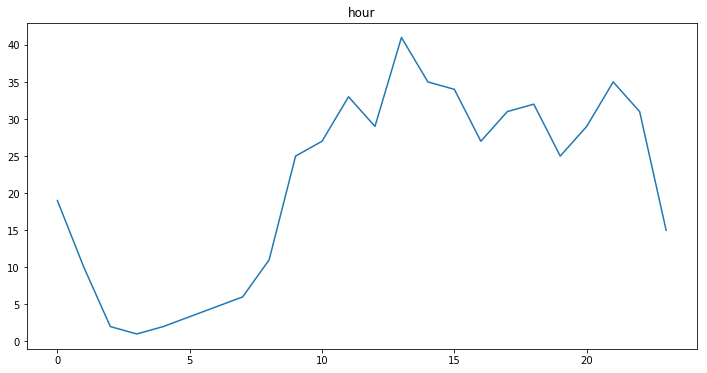

In [16]:
#hour count plot, not for every subreddit

#Make a line plot showing the number of posts per hour/day/month, 
#depending on the frequency of posting in your chosen subreddit. 
#You'll need to convert the time of creation to a new Pandas series and resample that to hour/day/month.


df["hour"] = df.time.dt.strftime("%H") #changing the format of the time 
df["hour"] = pd.to_numeric(df.hour)


counts_hours = df["hour"].value_counts().sort_index()
counts_hours.plot(x="hour", figsize= (12,6), title ="hour")

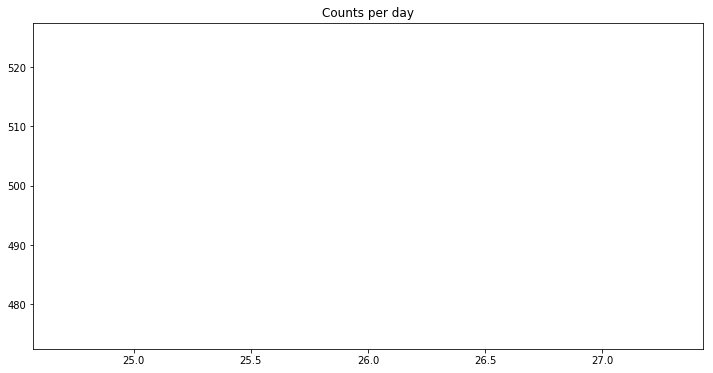

In [12]:
#daycount plot, not for every subreddit

df["day"] = df.time.dt.strftime("%d") #changing the format of the time
df["day"] = pd.to_numeric(df.day)

counts_days = df["day"].value_counts().sort_index()
counts_days.plot( x="day", figsize= (12,6), title="Counts per day")

In [13]:
#In your Dataframe, find the single submission with the most comments. 
#Optionally, show the title, number of comments and score for this submission.

df = pd.DataFrame(submissions)
   
most_comments = df.sort_values("comments", ascending=False).head(1)
print (most_comments)

index_most_comment = int(most_comments.index.values)

       author  comments  score                      time  \
127  Shinxzen       119    848  Mon Nov 12 10:13:05 2018   

                                   title  
127  Deze is voor mijn HAVO/VWO makkers!  


In [14]:
#For the same submission, show the top five comments and their score, 
#name of the commenter and the first 100 characters of the comment text.

recent=list(recent)
top_comments=[]
for comment in recent[index_most_comment].comments:
    if isinstance(comment, praw.models.MoreComments):
        continue
    top_comments.append({
        "author_of_comment": str(comment.author),
        "comment_score": comment.score,
        "comment" : comment.body[0:100],
    })

    
pd.options.display.max_colwidth = 150     #so you can see the whole comment
df_c = pd.DataFrame(top_comments)
df_c.sort_values("comment_score", ascending=False).head()


,author_of_comment,comment,comment_score
1,Chipskop,Gymnasium is vwo\n\nDeze memerij was een binnenzaak,256
0,mennodendam,5 uur,118
3,SovjetSpySovnjir,Latijn lijkt me beter dan Frans,91
2,Grammatikaas,Atheneumbende≠havobende,52
8,MatsLikeABoss,Je zou alleen maar Engels en Nederlands leren!\n\n*Deze meem is gemaakt door MAVO bende*,38


In [15]:
#A single user might have multiple comments in this submission. 
#Calculate the summed score for every commenter in the submission.
#Then, show the top five commenters and their summed score. 

df_csum = df_c.groupby("author_of_comment")["comment_score"].sum().sort_values(ascending = False)
df_csum.head()

author_of_comment
Chipskop            256
mennodendam         118
SovjetSpySovnjir     91
Grammatikaas         52
MatsLikeABoss        38
Name: comment_score, dtype: int64

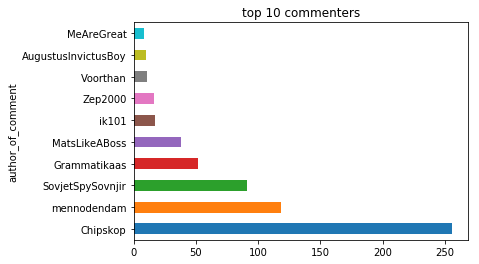

In [16]:
#Display a horizontal bar chart with the top 10 commenters with the highest summed scores.

df_csum[0:10].plot( kind = 'barh', title = 'top 10 commenters')